In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


# Load the Excel File

In [2]:
import pandas as pd

# Specify the file path
file_path = r'C:\Users\anujn\Desktop\assigment 2\Data Analyst Intern Assignment - Excel.xlsx'

# Load the Excel file
excel_data = pd.ExcelFile(file_path)

# Check the sheet names
print("Sheet names:", excel_data.sheet_names)


Sheet names: ['UserDetails.csv', 'CookingSessions.csv', 'OrderDetails.csv']


# Load Each Table

In [8]:
user_details = excel_data.parse('UserDetails.csv')
cooking_sessions = excel_data.parse('CookingSessions.csv')
order_details = excel_data.parse('OrderDetails.csv') 

print("User Details:")
print(user_details.head())

print("Cooking Sessions:")
print(cooking_sessions.head())

print("Order Details:")
print(order_details.head())

User Details:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
Cooking Sessions:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad

# Handle Missing Values

In [11]:
print(order_details.isnull().sum())
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64


In [19]:
order_details.dropna(inplace = True)


# Merge the Data

In [23]:
# Merge user_session Table with cooking_session Table

merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how = 'inner')

# Merge the result with order_details table
final_data = pd.merge(merged_data, order_details, on='User ID', how = 'inner')

final_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID_x,...,Session Rating,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Session ID_y
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,4.5,1009,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
3,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
4,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,4.2,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004


# Perform Analysis

In [30]:
# Most popular dishes
popular_dishes = final_data['Dish Name_y'].value_counts().head(5)
print("Top 5 Popular Dishes:")
print(popular_dishes)


Top 5 Popular Dishes:
Dish Name_y
Spaghetti          9
Caesar Salad       7
Pancakes           6
Grilled Chicken    6
Oatmeal            3
Name: count, dtype: int64


## Understand the age distribution, location-wise concentration, and registration trends.

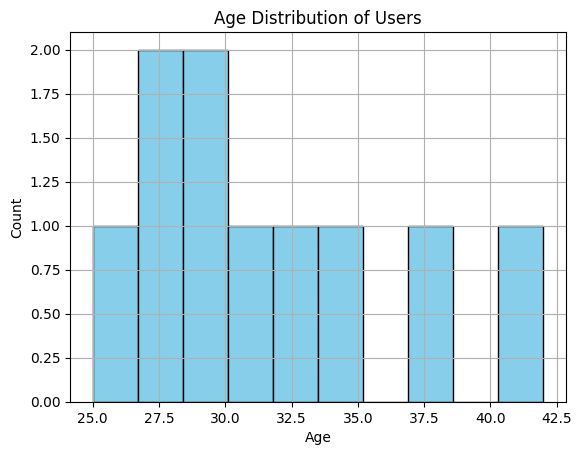

In [41]:
user_details['Age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## Group users by Location to identify the most and least active locations.

In [43]:
Location_data = user_details['Location'].value_counts()
location_data.head


<bound method NDFrame.head of Location
New York         1
Los Angeles      1
Chicago          1
San Francisco    1
Seattle          1
Austin           1
Boston           1
Miami            1
Dallas           1
Phoenix          1
Name: count, dtype: int64>

# User Behavior
#### Identify the most popular meals by counting the occurrences in Favorite Meal

In [46]:
popular_meals = user_details['Favorite Meal'].value_counts()
print(popular_meals)

Favorite Meal
Dinner       5
Lunch        3
Breakfast    2
Name: count, dtype: int64


#### Analyze the distribution of Total Orders to identify highly active users.

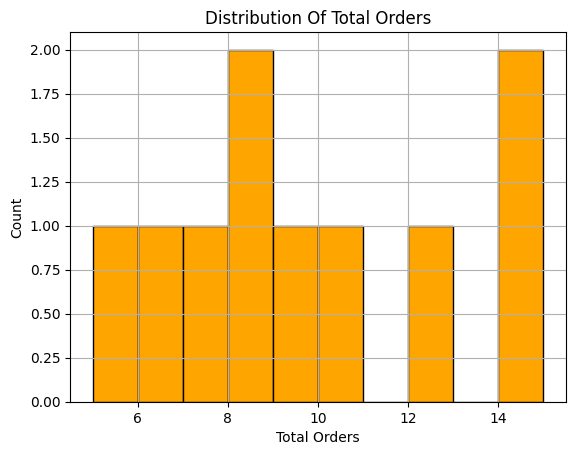

In [53]:
user_details['Total Orders'].hist(bins = 10, color='orange', edgecolor='black')
plt.title('Distribution Of Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Count')
plt.show()

# Session Analysis
#### Calculate the average rating per session and identify sessions with the highest/lowest ratings

In [57]:
avg_rating = final_data.groupby('Session ID_x')['Session Rating'].mean()
print(avg_rating.sort_values(ascending=False).head(10))


Session ID_x
S015    5.0
S009    4.9
S003    4.8
S014    4.8
S012    4.7
S005    4.7
S007    4.6
S011    4.6
S001    4.5
S013    4.4
Name: Session Rating, dtype: float64


#### Analyze which times of the day (e.g., morning, afternoon, evening) are most popular for sessions

In [66]:
time_of_day_counts = final_data['Time of Day'].value_counts()
print(time_of_day_counts)

Time of Day
Night      15
Morning     9
Day         8
Name: count, dtype: int64


# Ratings Analysis

#### Plot the distribution of Rating to see the general user satisfaction levels

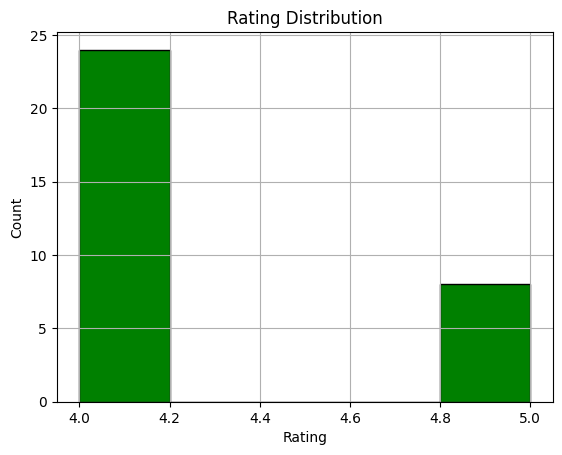

In [70]:
final_data['Rating'].hist(bins=5, color='green', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Revenue Insights:

In [71]:
total_revenue = final_data['Amount (USD)'].sum()
avg_revenue = final_data['Amount (USD)'].mean()
print(f"Total Revenue: ${total_revenue:.2f}, Average Revenue: ${avg_revenue:.2f}")

Total Revenue: $349.50, Average Revenue: $10.92
